Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 72us/step - loss: 0.3647 - acc: 0.8973 - val_loss: 0.1740 - val_acc: 0.9503
Epoch 2/5
48000/48000 [==============================] - 3s 59us/step - loss: 0.1521 - acc: 0.9563 - val_loss: 0.1368 - val_acc: 0.9606
Epoch 3/5
48000/48000 [==============================] - 3s 60us/step - loss: 0.1110 - acc: 0.9674 - val_loss: 0.1172 - val_acc: 0.9655
Epoch 4/5
48000/48000 [==============================] - 3s 57us/step - loss: 0.0850 - acc: 0.9743 - val_loss: 0.1058 - val_acc: 0.9689
Epoch 5/5
10000/10000 [==============================] - 0s 24us/step
Test Loss and Acc ->  [0.09971562526538037, 0.9671000063419342]


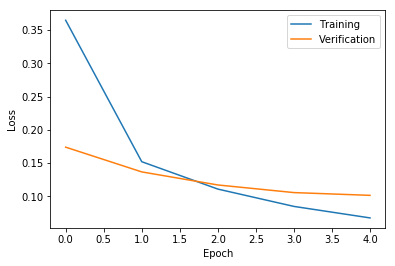

[0.8972708352841436, 0.9562708367904027, 0.9673750060300033, 0.9742916765312354, 0.9798333443701267]


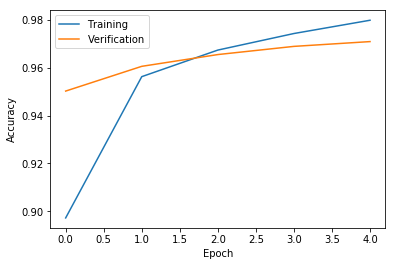

In [3]:
from keras import layers, models, datasets
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

Nin= 784
Nh_l = [100,50]
number_of_class = 10
Nout =  number_of_class

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    print(history['acc'])
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

class DNN(models.Sequential):
    def __init__(self,Nin,Nh_l,Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0],activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1],activation='relu',input_shape=(Nin,), name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

(x_train,y_train), (x_test,y_test) = datasets.mnist.load_data()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Image_num, Image_col, Image_row = x_train.shape
x_train = x_train.reshape(-1, Image_col *Image_row) / 255.0
x_test = x_test.reshape(-1, Image_col*Image_row) / 255.0

model= DNN(Nin,Nh_l,Nout)
history = model.fit(x_train,y_train,epochs=5, batch_size = 100, validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size =100)
print('Test Loss and Acc -> ',performance_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()